# Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
#abrindo os nossos arquivos json direto da web
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m')

In [ ]:
#sorteando 5 nomes aleatórios da nossa variável nomes_f, referentes a nomes femininos
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
14,JESSICA,0,456472,15,F
2,FRANCISCA,0,721637,3,F
9,ALINE,0,509869,10,F
3,ANTONIA,0,588783,4,F
13,BRUNA,0,460770,14,F


In [ ]:
#sorteando 5 nomes aleatórios da nossa variável nomes_m, referentes a nomes masculinos
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
14,MARCELO,0,690098,15,M
16,EDUARDO,0,628539,17,M
2,ANTONIO,0,2567494,3,M
10,LUIS,0,931530,11,M
12,RAFAEL,0,814709,13,M


In [ ]:
#vamos ver quantos nomes temos nas nossas variáveis
print('Na variável de nomes femininos, temos {} nomes'.format(len(nomes_f)))
print('Na variável de nomes masculinos, temos {} nomes'.format(len(nomes_m)))

#vamos ver quantos temos nas duas variáveis
print('No total, temos: ' + str(len(nomes_f) + len(nomes_m)) + ' nomes')

Na variável de nomes femininos, temos 20 nomes
Na variável de nomes masculinos, temos 20 nomes
No total, temos: 40 nomes


In [ ]:
#vamos juntar nossas duas variáveis, primeiro vamos criar uma variável com as duas passadas em uma lista
frames = [nomes_f, nomes_m]

In [ ]:
#vamos agora concatenar nossas duas tabelas, mas pegando apenas a coluna "NOME", além disso, nossa variável nomes será um dataframe
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.sample(5)

,nome
5,PAULO
16,JULIA
0,MARIA
2,FRANCISCA
10,SANDRA


# Incluindo ID dos alunos

In [ ]:
#vamos gerar os IDs dos nossos alunos de forma aleatória, pensando em um mundo real, cada aluno tem um ID único
#vamos usar a biblioteca do numpy para gerar esse ID único, usando a função random()
#usamos seed() para deixar único o valor aleatório, assim quando não rodarmos o código novamente, não gerar um novo número
import numpy as np
np.random.seed(123)

In [ ]:
#vamos confirmar quantos alunos temos na nossa variável nomes
total_alunos = len(nomes)
total_alunos

40

In [ ]:
#vamos criar a nossa nova coluna chamada id_aluno, criando um valor de ID random e também não ordenado, usando a função permutation()
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [ ]:
#vamos verificar se deu certo, comparando a posição que aparece vs seu ID
nomes.sample(5)
#constatamos que nosso código deu certo

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10


In [ ]:
#vamos criar também domínios e e-mails para nossos alunos, de acordo com dois domínios ficticios
#usaremos a função .choice() para escolher entre um dos dois domínios que temos, de acordo com o número de alunos
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
#vamos ver como ficou nossa variável até o momento
nomes.head(5)

,nome,id_aluno,dominio
0,MARIA,7,@dominiodoemail.com.br
1,ANA,11,@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com
3,ANTONIA,39,@servicodoemail.com
4,ADRIANA,6,@dominiodoemail.com.br


In [ ]:
#vamos agora criar uma coluna chamada e-mail, transformando em string, usando a função .cut() para concatenar as palavras, transformando em string também e todos os caracteres serão minúsculos
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [ ]:
#vamos verificar se nossa coluna foi criada com sucesso
nomes.head(5)
#criada com excelência

,nome,id_aluno,dominio,email
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br


# Criando a tabela cursos

In [ ]:
#instalando bibliotecas para criar a nossa tabela de cursos
!pip3 install html5lib
!pip3 install lxml

In [ ]:
#importando a biblioteca agora para usarmos
import html5lib

In [ ]:
#vamos armazenar os nossos cursos que estão salvos em uma página html em uma variável chamada "cursos"
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
#tipo da variável
type(cursos)

list

In [ ]:
#vamos converter para dataframe
cursos = cursos[0]

In [ ]:
#vamos verificar se é um DF mesmo
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
#vamos testar um comando comum para ver as primeiras linhas
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [ ]:
#vamos renomear o nome da nossa coluna, para fácil manuseio em um futuro que necessite usar essa variável
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [ ]:
#vamos criar uma coluna que será nosso ID
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head(3)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3


In [ ]:
#no entanto, isso pode gerar uma dúvida, usaremos o index ou o ID para identificar o curso?
#para não ter essa dúvida, vamos transformar nosso id em index
cursos = cursos.set_index('id')

In [ ]:
#podemos notar que a nossa alteração fez sentido:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos
### No mundo real poucos alunos fazem um curso, menos ainda fazem dois, e assim por diante...

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
14,MARCELO,23,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
9,ALINE,21,@servicodoemail.com,aline@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br


In [ ]:
#vamos criar uma coluna chamada matriculas e com número de matriculas de forma randomica pela biblioteca numpy usando a forma exponencial
#muitos no começo e poucos no final, com o tamanho o total de alunos (len(alunos) + 1) com o tipo inteiro
#como queremos que tenha pelo menos uma matricula, vamos usar o np.ceil que começa no 1 a nossa exponencial
#mesmo com a parte exponencial, ainda teremos muitas matriculas em 1, poucas em 2 e menos ainda em 3
#então vamos multiplicar o valor random por 1.5 e depois pegar apenas a parte inteira
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
5,PAULO,28,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,4
12,AMANDA,25,@servicodoemail.com,amanda@servicodoemail.com,1
18,VANESSA,22,@servicodoemail.com,vanessa@servicodoemail.com,2
18,RAIMUNDO,29,@servicodoemail.com,raimundo@servicodoemail.com,1
7,FERNANDA,2,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br,3


In [ ]:
#vamos entender como ficou a nossa distribuição com uma função de estatística descritiva (.describe())
nomes.matriculas.describe()

count    40.000000
mean      2.150000
std       1.672554
min       1.000000
25%       1.000000
50%       2.000000
75%       2.250000
max       7.000000
Name: matriculas, dtype: float64

In [ ]:
#com as estatísticas descritivas acima conseguimos ter uma ideia, mas a melhor forma de visualizar uma distribuição é através de um gráfico
#vamos utilizar a biblioteca seaborn para isso
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


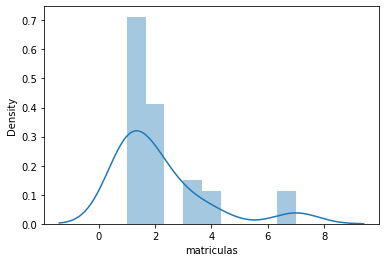

In [ ]:
#vamos plotar um histograma, muito comum para distribuições do tipo que estamos tratando
sns.distplot(nomes['matriculas'])

In [ ]:
#vamos visualizar quantas matrículas temos para o número de alunos
nomes['matriculas'].value_counts()

1    19
2    11
3     4
7     3
4     3
Name: matriculas, dtype: int64

In [ ]:
#de forma aleatória, vamos visualizar essas matrículas
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com,1
6,MARCIA,24,@servicodoemail.com,marcia@servicodoemail.com,2
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,2
17,FELIPE,35,@dominiodoemail.com.br,felipe@dominiodoemail.com.br,1
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,7


# Selecionando cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,7
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,2
8,PATRICIA,14,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,2
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br,1


In [ ]:
#criamos uma lista vazia para armazenar nossas matriculas
#também criamos um x que são 20 números aleatórios (20 = número de cursos)
#por fim, criamos uma probabilidade que é x / a soma de x
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
#vamos atribuir os cursos para os alunos de maneira aleatória
#vamos pegar o index e a linha, e passar linha a linha da variável nomes com iterrows()
for index, row in nomes.iterrows(): #para as colunas e linhas da variável nome linha a linha (iterrows)
  id = row.id_aluno #id será a linha da coluna id_aluno (row['id_aluno']) que é o id único do aluno
  matriculas = row.matriculas #a matricula será a linha da coluna matriculas (row['matricula']) que é quantas matriculas o aluno tem (sendo cada uma, um curso)
  for i in range(matriculas): #para i no tamanho de matriculas
    mat = [id, np.random.choice(cursos.index, p = prob)] #criando uma matricula que será um lista com o ID e o valor escolhido aleatório com base nos valores da variável cursos, com uma probabilidade calculada
    todas_matriculas.append(mat) #depois, vamos pegar essa lista de id e curso e armazenar na nossa variável vazia chamada todas_matriculas

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso']) #vamos criar um novo DF chamado matriculas com base na nossa variável todas as matriculas que tem as colunas id_aluno e id_curso

In [ ]:
#vamos ver as primeiras linhas do nosso DF
matriculas.head()

,id_aluno,id_curso
0,7,20
1,11,7
2,11,2
3,13,11
4,13,20


In [ ]:
#vamos agrupar o id do aluno com o ID do curso agora
#pegamos nosso DF matriculas e agrupamos por id do curso e contamos quantos tem, depois juntamos a tabela nome do curso com seu ID específico e renomeamos a coluna id_curso para quantidade de alunos (pois fizemos um count())
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,8,Java para Web
3,10,C# para Web
5,4,Cursos de Python
6,3,PHP com MySql
7,6,.NET para web
9,3,TDD com Java
10,1,Código limpo com C#
11,3,Preparatório para certificação Java


# DataFrames que criamos até o momento

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
5,JULIANA,12,@servicodoemail.com,juliana@servicodoemail.com,1
12,AMANDA,25,@servicodoemail.com,amanda@servicodoemail.com,1
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com,1


In [ ]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [ ]:
matriculas.head(3)

,id_aluno,id_curso
0,7,20
1,11,7
2,11,2


In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,8,Java para Web
3,10,C# para Web


# Saída em diferentes formatos (Exportação)

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,8,Java para Web
3,10,C# para Web


In [ ]:
#vamos salvar a nossa tabela acima em formato de CSV para outras pessoas também conseguirem usar
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
#vamos testar se foi salvo
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,7,Lógica de programação
1,8,Java para Web
2,10,C# para Web
3,4,Cursos de Python
4,3,PHP com MySql
5,6,.NET para web
6,3,TDD com Java
7,1,Código limpo com C#
8,3,Preparatório para certificação Java
9,6,Hardware básico


In [ ]:
#vamos salvar em formato de json, que foi o primeiro formato que lemos
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
#vamos visualizar:
matriculas_json

'{"quantidade_de_alunos":{"1":7,"2":8,"3":10,"5":4,"6":3,"7":6,"9":3,"10":1,"11":3,"12":6,"13":8,"14":1,"16":7,"17":5,"18":7,"20":7},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
#além disso, também usamos o formato html, vamos ver como salvamos nesse formato também:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
#vamos visualizar
print(matriculas_html)
#como está em formato de HTML, vamos abrir no VSCODE e salvar como HTML o código, para visualizar na WEB :)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>7</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>10</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>6</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>9</th>
      <td>3</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1</td>
      <td>Código limpo com C#</td>
    </tr>
    <tr>
      <th>11</th>
      <td>3</td>
      <td>Prep

# Criando o banco sql

In [ ]:
#instalando o pacote que iremos usar
!pip install sqlalchemy

In [ ]:
#importando o pacote
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [ ]:
#Onde iremos salvar o nosso banco, bem como como ele é:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
#escrevendo nossas matriculas por curso em forma de sql (salvando ela)
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
inspector = inspect(engine) # criando um Inspector object para visualizar nosso banco de dados
print(inspector.get_table_names()) # Exibindo as tabelas com o inspector

['matriculas']


# Buscando do banco sql

In [ ]:
#buscando dentro do nosso banco de dados e trazendo todas as colunas dos cursos que tem a quantidade de matriculas < 20
query = 'select * from matriculas where quantidade_de_alunos < 6'

In [ ]:
#vamos executar a nossa query agora, utilizando nossa engine (banco de dados)
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,4,Cursos de Python
1,6,3,PHP com MySql
2,9,3,TDD com Java
3,10,1,Código limpo com C#
4,11,3,Preparatório para certificação Java
5,14,1,Desenvolvendo jogos
6,17,5,Internet das coisas


In [ ]:
#uma outra forma de consultar alguma informação:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,7
1,Java para Web,8
2,C# para Web,10
3,Cursos de Python,4
4,PHP com MySql,3
5,.NET para web,6
6,TDD com Java,3
7,Código limpo com C#,1
8,Preparatório para certificação Java,3
9,Hardware básico,6


In [ ]:
#vamos utilizar a query para salvar em uma variável
matriculas_banco = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
matriculas_banco

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,7
1,Java para Web,8
2,C# para Web,10
3,Cursos de Python,4
4,PHP com MySql,3
5,.NET para web,6
6,TDD com Java,3
7,Código limpo com C#,1
8,Preparatório para certificação Java,3
9,Hardware básico,6


In [ ]:
#vamos utilizar o pandas para fazer uma pesquisa com o método .query()
#vamos salvar em outra variável essa query:
matriculas_mais7 = matriculas_banco.query('quantidade_de_alunos > 7')

In [ ]:
matriculas_mais7

,nome_do_curso,quantidade_de_alunos
1,Java para Web,8
2,C# para Web,10
10,Persistência com .NET,8


# Escrevendo no banco

In [ ]:
#vamos salvar essa última variável criada no nosso banco
matriculas_mais7.to_sql('matriculas_mais_que_sete', con=engine)

In [ ]:
#verificando que bancos possuimos no nosso banco de dados
print(engine.table_names())

['matriculas', 'matriculas_mais_que_sete']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


# Nomes dos alunos e alunas da próxima turma

In [ ]:
#vamos visualizar nosso dataframe dos cursos
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,8,Java para Web
3,10,C# para Web
5,4,Cursos de Python
6,3,PHP com MySql
7,6,.NET para web
9,3,TDD com Java
10,1,Código limpo com C#
11,3,Preparatório para certificação Java


In [ ]:
#vamos visualizar nosos dataframe que tem ids de curso e aluno
matriculas

,id_aluno,id_curso
0,7,20
1,11,7
2,11,2
3,13,11
4,13,20
...,...,...
81,20,3
82,18,2
83,35,9
84,29,7


In [ ]:
#vamos passar os alunos do curso C# para Web, que tem id = 3
id_curso = 3

#agora vamos selecionar do nosso dataframe os alunos que tem id_curso = 3
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))

In [ ]:
proxima_turma

,id_aluno,id_curso
8,24,3
12,2,3
21,8,3
23,19,3
25,40,3
33,26,3
52,15,3
62,16,3
67,37,3
81,20,3


In [ ]:
#agora temos o id do aluno e do curso, precisamos do nome do aluno, iremos fazer um join entre as duas tabelas
#vamos verificar os nomes
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,2
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,1
14,MARCELO,23,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,4


In [ ]:
#cruzando as tabelas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
24,3,MARCIA,@servicodoemail.com,marcia@servicodoemail.com,2
2,3,FERNANDA,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br,3
8,3,BRUNA,@servicodoemail.com,bruna@servicodoemail.com,1
19,3,JESSICA,@servicodoemail.com,jessica@servicodoemail.com,3
40,3,LETICIA,@servicodoemail.com,leticia@servicodoemail.com,1
26,3,JOSE,@servicodoemail.com,jose@servicodoemail.com,7
15,3,PEDRO,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,7
16,3,MARCOS,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,3
37,3,GABRIEL,@servicodoemail.com,gabriel@servicodoemail.com,2


In [ ]:
#com a tabela cruzada, vimos que não precisamos de todas as colunas, só o nome
#vamos filtrar
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
24      MARCIA
2     FERNANDA
8        BRUNA
19     JESSICA
40     LETICIA
26        JOSE
15       PEDRO
16      MARCOS
37     GABRIEL
20       BRUNO
Name: nome, dtype: object

In [ ]:
#a tabela anterior ficou feia a visualização, vamos transformar em dataframe para melhor visualização:
curso_c_sharp = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
#vamos renomear nossa coluna, para definir o nome do curso, para isso precisamos descobrir o nome do curso
nome_curso = cursos.loc[id_curso]
nome_curso = nome_curso.nome_do_curso
nome_curso

'C# para Web'

In [ ]:
#sabendo que o nome do curso é C# para Web, vamos renomear na nossa tabela
proxima_turma = curso_c_sharp.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
#vamos testar se funcionou, vamos trazer 5 pessoas aleatórias:
proxima_turma.sample(5)

,Alunos do curso de C# para Web
id_aluno,
40,LETICIA
19,JESSICA
2,FERNANDA
16,MARCOS
8,BRUNA


# Exportando para Excel nossa próxima turma

In [ ]:
#vamos exportar nossa base para uma planilha de excel
proxima_turma.to_excel('curso_c_sharp.xlsx', index = False)

In [ ]:
#caso eu quisesse abrir uma tabela do excel:
pd.read_excel('curso_c_sharp.xlsx')

,Alunos do curso de C# para Web
0,MARCIA
1,FERNANDA
2,BRUNA
3,JESSICA
4,LETICIA
5,JOSE
6,PEDRO
7,MARCOS
8,GABRIEL
9,BRUNO
